In [1]:
import pandas as pd

df=pd.read_csv('SVM_Dataset1.csv', index_col=0)

df

,X1,X2,y
0,2.947814,6.626878,1
1,2.530388,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1
5,2.155826,6.222343,-1
6,3.273418,3.520687,-1


In [2]:
import numpy as np
X1=df['X1']
X2=df['X2']
X_train=np.array(list(zip(X1,X2)))
y_train=df['y'].values
print(X_train)
print(y_train)

[[2.947814 6.626878]
 [2.530388 7.78505 ]
 [3.566991 5.651046]
 [3.156983 5.467077]
 [2.582346 4.457777]
 [2.155826 6.222343]
 [3.273418 3.520687]]
[ 1  1  1  1 -1 -1 -1]


In [6]:
color_ls = []
for y in y_train:
    if y == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')

print(color_ls)
label = []

for y in y_train:
    if y == 1:
        label.append('H')
    else:
        label.append('NH')

['b', 'b', 'b', 'b', 'r', 'r', 'r']


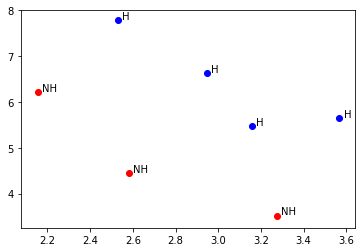

In [10]:
import matplotlib.pyplot as plt
for index, (element_1,element_2) in enumerate(X_train):
    plt.scatter(element_1, element_2, c = color_ls[index])
    plt.text(element_1+0.02, element_2+0.02, label[index])

In [12]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

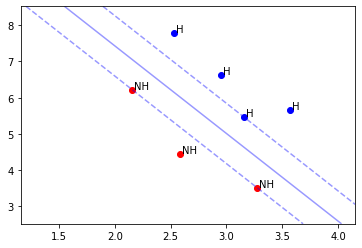

In [14]:
plot_decision_boundary(svm_classifier, X_train, y_train)
for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

In [15]:
svm_classifier.n_support_

array([2, 1], dtype=int32)

In [16]:
svm_classifier.support_vectors_

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

In [17]:
slopes=svm_classifier.coef_

In [18]:
print(slopes)

[[2.90336685 1.20121959]]


In [19]:
intercept=svm_classifier.intercept_

In [20]:
print(intercept)

[-14.73321143]


In [22]:
#predict with line, if positive healthy, if negative not healthy
print(slopes[0][0]*3+slopes[0][1]*6+intercept[0])

1.1842066592050333


In [23]:
svm_classifier.predict([[3,6]])

array([1])

In [32]:
df2=pd.read_csv('SVM_Dataset2.csv')

df2

,x1,x2,y
0,7.0,20,-1
1,8.0,12,-1
2,9.0,19,-1
3,10.0,17,-1
4,11.0,15,-1
5,13.0,14,-1
6,14.0,12,-1
7,15.0,14,-1
8,15.0,17,-1
9,16.0,16,-1


In [40]:
X1=df2['x1']
X2=df2['x2']
X_train=np.array(list(zip(X1,X2)))
y_train=df2['y'].values
print(X_train)
print(y_train)

[[ 7.  20. ]
 [ 8.  12. ]
 [ 9.  19. ]
 [10.  17. ]
 [11.  15. ]
 [13.  14. ]
 [14.  12. ]
 [15.  14. ]
 [15.  17. ]
 [16.  16. ]
 [ 4.  15. ]
 [ 5.5 12. ]
 [ 7.  10. ]
 [ 8.  10. ]
 [ 9.   9. ]
 [10.   8. ]
 [11.   5. ]
 [12.   7. ]
 [12.   9. ]
 [13.  10. ]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1]


In [46]:
color_ls = []
for y in y_train:
    if y == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')

print(color_ls)
label = []

for y in y_train:
    if y == 1:
        label.append('H')
    else:
        label.append('NH')

svm_classifier = svm.SVC(kernel='poly',degree=2, C=10)
svm_classifier.fit(X_train, y_train)        


['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

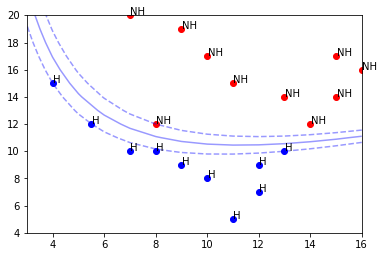

In [47]:
plot_decision_boundary(svm_classifier, X_train, y_train)
for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)